<a href="https://colab.research.google.com/github/mihika-shrivastava/text-to-image/blob/main/text-to-image/original_with_mask/hills_masked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Location of all hill segmentations: https://github.com/mihika-shrivastava/text-to-image/tree/main/semantic_segmentation/hills_segmented

#**Importing images**

In [1]:
import zipfile
import os

In [2]:
!wget --no-check-certificate \
    "https://github.com/mihika-shrivastava/text-to-image/archive/refs/heads/main.zip" \
    -O "/tmp/hills_segmented.zip"

--2023-04-22 09:49:42--  https://github.com/mihika-shrivastava/text-to-image/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/mihika-shrivastava/text-to-image/zip/refs/heads/main [following]
--2023-04-22 09:49:42--  https://codeload.github.com/mihika-shrivastava/text-to-image/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55574054 (53M) [application/zip]
Saving to: ‘/tmp/hills_segmented.zip’

/tmp/hills_segmente 100%[===================>]  53.00M  32.2MB/s    in 1.6s    

2023-04-22 09:49:44 (32.2 MB/s) - ‘/tmp/hills_segmented.zip’ saved [55574054/55574054]



In [3]:
zip_ref = zipfile.ZipFile('/tmp/hills_segmented.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/tmp') # Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Concatenate, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt

#**single image**

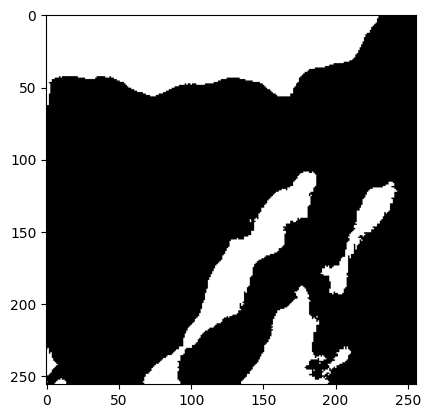

In [6]:
# Load the image
masked_img = cv2.imread("/tmp/text-to-image-main/semantic_segmentation/hills_segmented/0000000_finalprediction.ome.tiff")
plt.imshow(masked_img)

In [8]:
# Extract black pixels
hill_mask = np.where(np.all(masked_img == [0,0,0], axis=-1))
print(hill_mask)

(array([  0,   0,   0, ..., 255, 255, 255]), array([230, 231, 232, ..., 253, 254, 255]))


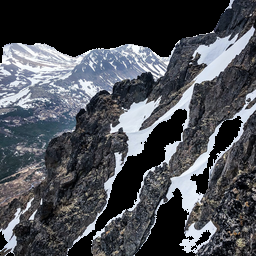

In [10]:
og_img = cv2.imread('/tmp/text-to-image-main/original_images/0000000.png')

# Create mask image
mask = np.zeros_like(og_img)
mask[hill_mask] = [255, 255, 255]

# Apply mask to original image
masked_on_og_img = cv2.bitwise_and(og_img, mask)

# Display the masked image
cv2_imshow(masked_on_og_img)

Text(0.5, 1.0, 'Mask on original image')

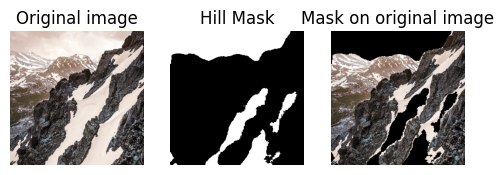

In [13]:
#@title ###**Visualization of Hill Masks**
# code for displaying multiple images in one figure
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 1
columns = 5

# Image 1
fig.add_subplot(rows, columns, 1)
plt.imshow(og_img)
plt.axis('off')
plt.title("Original image")

# Image 2
fig.add_subplot(rows, columns, 2)
plt.imshow(masked_img)
plt.axis('off')
plt.title("Hill Mask")

# Image 3
fig.add_subplot(rows, columns, 3)
plt.imshow(masked_on_og_img)
plt.axis('off')
plt.title("Mask on original image")



#**finding pixels of hill regions for the entire dataset**

In [8]:
import os
import csv
import numpy as np

In [9]:
mask_folder = "/tmp/text-to-image-main/semantic_segmentation/hills_segmented"
original_folder = "/tmp/text-to-image-main/original_images"
output_folder = "/tmp/output"

In [10]:
mask_filenames = os.listdir(mask_folder)

for mask_filename in mask_filenames:
    common_part = os.path.splitext(os.path.basename(mask_filename))[0].split("_")[0]
    original_filename = common_part
    mask_image = cv2.imread(os.path.join(mask_folder, mask_filename), cv2.IMREAD_GRAYSCALE)
    inverted_mask = cv2.bitwise_not(mask_image)

    original_image_path = os.path.join(original_folder, original_filename)
    if os.path.isfile(original_image_path + ".jpg"):
        original_image = cv2.imread(original_image_path + ".jpg")
    elif os.path.isfile(original_image_path + ".png"):
        original_image = cv2.imread(original_image_path + ".png")
    else:
        # if the original image is not found, skip to the next mask image
        continue
    white_image = np.ones_like(original_image) * 255
    
    # Apply the mask to the white image
    masked_image = cv2.bitwise_and(white_image, white_image, mask=mask_image)
    
    # Combine the masked image with the original image
    final_image = cv2.bitwise_or(original_image, masked_image)
    
    # Construct the filename for the masked image
    masked_filename = common_part + "_masked.jpg"
    
    # Save the masked image to the output folder
    cv2.imwrite(os.path.join(output_folder, masked_filename), final_image)


In [11]:
import zipfile
import os

zip_name = "output_files.zip"
zip_path = os.path.join(output_folder, zip_name)

with zipfile.ZipFile(zip_path, "w") as zip_file:
    for file_name in os.listdir(output_folder):
        if file_name == zip_name:
            continue
        file_path = os.path.join(output_folder, file_name)
        zip_file.write(file_path, file_name)

print("ZIP archive created:", zip_path)


ZIP archive created: /tmp/output/output_files.zip
